In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [120]:
plt.style.use('ggplot')
plt.style.use('seaborn-bright')

In [121]:
tv_usage_info = pd.read_csv("data/3.1 PEO TV usage Information.csv")
tv_usage_info

,event_source.hash,monthly_usage,peo_package,ym
0,8418762d5335fd0b3c1f30ed200c7e15,31:51:28,PEO_GOLD,202012.0
1,8418762d5335fd0b3c1f30ed200c7e15,30:19:15,PEO_GOLD,202102.0
2,8418762d5335fd0b3c1f30ed200c7e15,45:41:23,PEO_GOLD,202105.0
3,8418762d5335fd0b3c1f30ed200c7e15,87:32:22,PRANAMA,202104.0
4,8418762d5335fd0b3c1f30ed200c7e15,62:47:06,PEO_GOLD,202103.0
...,...,...,...,...
264662,be931eff5adf178900810bd1201d4cb3,246:22:58,PEO_SILVER,202102.0
264663,e4be2ee7c93bbf6fd17f04c085684622,120:26:38,PEO_SILVER_FTTH,202104.0
264664,41507d147b6c1178afe9a95f485efb03,NaN,NaN,NaN
264665,be931eff5adf178900810bd1201d4cb3,320:51:05,PEO_SILVER,202011.0


In [122]:
tv_usage_info.dropna(subset = ["monthly_usage","peo_package","ym"],inplace=True)
tv_usage_info.shape

(208859, 4)

In [123]:
tv_usage_info.rename(columns = {"ym": "year-month","monthly_usage":"usage","peo_package":"Peo_TV_Package"}, inplace = True)

In [124]:
tv_usage_info.isnull().sum(axis=0)

event_source.hash    0
usage                0
Peo_TV_Package       0
year-month           0
dtype: int64

In [125]:
def get_duration(val):
    time= 0
    if val != "0":
        val_list = val.split(":")
        time = int(val_list[0]) + int(val_list[1])/60
    return time

In [126]:
#test case 1
get_duration("145:09:52")

145.15

In [127]:
# test case 2
get_duration("0")

0

In [128]:
tv_usage_info['usage'] = tv_usage_info['usage'].apply(lambda x: get_duration(x))

In [129]:
tv_usage_info.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,usage,year-month
count,208859.00000,208859.00000
mean,118.26125,202083.55105
std,112.33557,38.43020
min,0.00000,202011.00000
25%,34.33333,202101.00000
50%,89.38333,202103.00000
75%,167.92500,202105.00000
max,719.98333,202107.00000


In [130]:
# binning call_count
usage_bins = [0,35,90,170,719]
tv_usage_info['rating'] = np.searchsorted(usage_bins, tv_usage_info['usage'].values)
tv_usage_info

,event_source.hash,usage,Peo_TV_Package,year-month,rating
0,8418762d5335fd0b3c1f30ed200c7e15,31.850000,PEO_GOLD,202012.0,1
1,8418762d5335fd0b3c1f30ed200c7e15,30.316667,PEO_GOLD,202102.0,1
2,8418762d5335fd0b3c1f30ed200c7e15,45.683333,PEO_GOLD,202105.0,2
3,8418762d5335fd0b3c1f30ed200c7e15,87.533333,PRANAMA,202104.0,2
4,8418762d5335fd0b3c1f30ed200c7e15,62.783333,PEO_GOLD,202103.0,2
...,...,...,...,...,...
264661,6b11f66b74588b0d0003c6dd203d7317,254.350000,PEO_SILVER,202102.0,4
264662,be931eff5adf178900810bd1201d4cb3,246.366667,PEO_SILVER,202102.0,4
264663,e4be2ee7c93bbf6fd17f04c085684622,120.433333,PEO_SILVER_FTTH,202104.0,3
264665,be931eff5adf178900810bd1201d4cb3,320.850000,PEO_SILVER,202011.0,4


In [131]:
# scaling usage rating
scaler = MinMaxScaler()
tv_usage_info['rating'] = scaler.fit_transform(tv_usage_info['rating'].values.reshape(-1,1))
tv_usage_info.drop(['usage'],axis=1)

,event_source.hash,Peo_TV_Package,year-month,rating
0,8418762d5335fd0b3c1f30ed200c7e15,PEO_GOLD,202012.0,0.2
1,8418762d5335fd0b3c1f30ed200c7e15,PEO_GOLD,202102.0,0.2
2,8418762d5335fd0b3c1f30ed200c7e15,PEO_GOLD,202105.0,0.4
3,8418762d5335fd0b3c1f30ed200c7e15,PRANAMA,202104.0,0.4
4,8418762d5335fd0b3c1f30ed200c7e15,PEO_GOLD,202103.0,0.4
...,...,...,...,...
264661,6b11f66b74588b0d0003c6dd203d7317,PEO_SILVER,202102.0,0.8
264662,be931eff5adf178900810bd1201d4cb3,PEO_SILVER,202102.0,0.8
264663,e4be2ee7c93bbf6fd17f04c085684622,PEO_SILVER_FTTH,202104.0,0.6
264665,be931eff5adf178900810bd1201d4cb3,PEO_SILVER,202011.0,0.8


<AxesSubplot:>

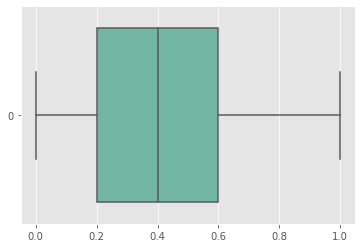

In [132]:
ax = sns.boxplot(data=tv_usage_info['rating'], orient="h", palette="Set2")
ax

<AxesSubplot:ylabel='Density'>

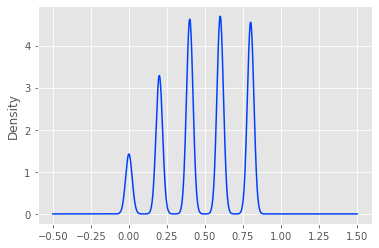

In [133]:
tv_usage_info['rating'].plot(kind = 'density')

In [134]:
usage_cols = tv_usage_info["year-month"].unique()
usage_cols

array([202012., 202102., 202105., 202104., 202103., 202107., 202106.,
       202011., 202101.])

In [135]:
tv_usage_info.to_csv("data/user_profile/PEO_TV_Usage_CF.csv")

### Pivot Table for User Profile

In [136]:
pivot_tv_usage_info = pd.pivot_table(tv_usage_info[['event_source.hash','rating','year-month']],index=['event_source.hash'],columns=['year-month'], aggfunc=np.sum, fill_value=0)
pivot_tv_usage_info

rating                                      \
year-month                       202011.0 202012.0 202101.0 202102.0 202103.0   
event_source.hash                                                               
000084a38b0fa5ca77e7989aa5eb2d06      0.0      0.0      0.6      0.4      0.6   
0002b2851b6416e9a5f94755364fcb5b      0.0      0.0      0.0      0.0      0.0   
00037482b9661d1614757baa198642a0      0.4      0.4      0.4      0.4      0.4   
000905c3467960583b458ff4e5334288      0.8      0.8      0.8      0.8      0.8   
000d8f77b0f59f66e4ceb43247503136      0.0      0.0      0.0      0.0      0.0   
...                                   ...      ...      ...      ...      ...   
fff4dab88a6b28ffb070b861ab668d71      0.4      0.4      0.4      0.4      0.4   
fff5c4216785d2e203627e56b97f9e2d      0.8      0.8      0.8      0.8      0.8   
fffb0e8122aa77f93a0ef854d1295cdd      0.0      0.0      0.0      0.2      0.2   
fffdede40561fb7b84c4c3941dec8e79      0.8      0.8      0.8      0.8      0.6   
fffec93ce3fdf1421bce8728acdb866c      0.6      0.6      0.8      0.6      0.6   

                                                                      
year-month                       202104.0 202105.0 202106.0 202107.0  
event_source.hash                                                     
000084a38b0fa5ca77e7989aa5eb2d06      0.4      0.4      0.6      0.4  
0002b2851b6416e9a5f94755364fcb5b      0.6      0.0      0.0      0.0  
00037482b9661d1614757baa198642a0      0.6      0.4      0.4      0.4  
000905c3467960583b458ff4e5334288      0.8      0.8      0.6      0.8  
000d8f77b0f59f66e4ceb43247503136      0.0      0.0      0.0      0.0  
...                                   ...      ...      ...      ...  
fff4dab88a6b28ffb070b861ab668d71      0.8      0.4      0.4      0.4  
fff5c4216785d2e203627e56b97f9e2d      0.4      0.2      0.4      0.8  
fffb0e8122aa77f93a0ef854d1295cdd      0.2      0.2      0.2      0.2  
fffdede40561fb7b84c4c3941dec8e79      0.4      0.6      0.6      0.6  
fffec93ce3fdf1421bce8728acdb866c      0.4      0.2      0.4      0.6  

[24262 rows x 9 columns]

<AxesSubplot:xlabel='year-month', ylabel='event_source.hash'>

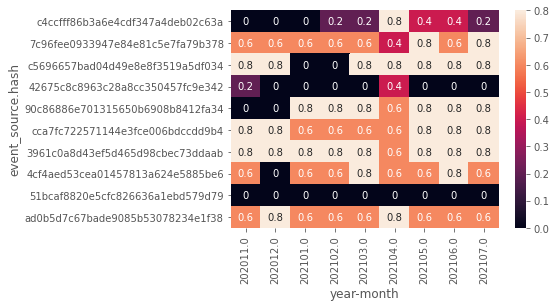

In [137]:
sns.heatmap(pivot_tv_usage_info['rating'].sample(n=10), annot=True)

<AxesSubplot:ylabel='year-month'>

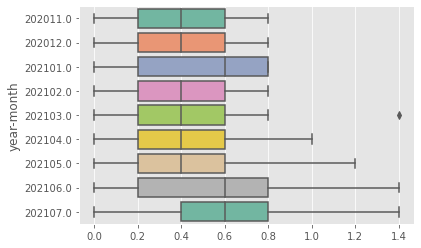

In [138]:
ax = sns.boxplot(data=pivot_tv_usage_info['rating'], orient="h", palette="Set2")
ax

<AxesSubplot:ylabel='Density'>

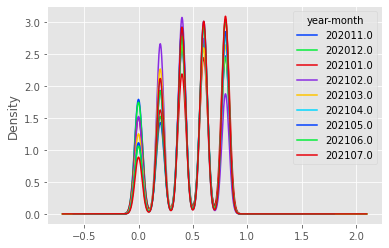

In [139]:
pivot_tv_usage_info['rating'].plot(kind = 'density')

In [140]:
pivot_tv_usage_info.columns = pd.Index(list(pivot_tv_usage_info.columns))

In [141]:
pivot_tv_usage_info['Usage_Rating_Scaled'] = pivot_tv_usage_info.sum(axis=1)/len(usage_cols)
pivot_tv_usage_info

rating                                      \
                                 202011.0 202012.0 202101.0 202102.0 202103.0   
event_source.hash                                                               
000084a38b0fa5ca77e7989aa5eb2d06      0.0      0.0      0.6      0.4      0.6   
0002b2851b6416e9a5f94755364fcb5b      0.0      0.0      0.0      0.0      0.0   
00037482b9661d1614757baa198642a0      0.4      0.4      0.4      0.4      0.4   
000905c3467960583b458ff4e5334288      0.8      0.8      0.8      0.8      0.8   
000d8f77b0f59f66e4ceb43247503136      0.0      0.0      0.0      0.0      0.0   
...                                   ...      ...      ...      ...      ...   
fff4dab88a6b28ffb070b861ab668d71      0.4      0.4      0.4      0.4      0.4   
fff5c4216785d2e203627e56b97f9e2d      0.8      0.8      0.8      0.8      0.8   
fffb0e8122aa77f93a0ef854d1295cdd      0.0      0.0      0.0      0.2      0.2   
fffdede40561fb7b84c4c3941dec8e79      0.8      0.8      0.8      0.8      0.6   
fffec93ce3fdf1421bce8728acdb866c      0.6      0.6      0.8      0.6      0.6   

                                                                      \
                                 202104.0 202105.0 202106.0 202107.0   
event_source.hash                                                      
000084a38b0fa5ca77e7989aa5eb2d06      0.4      0.4      0.6      0.4   
0002b2851b6416e9a5f94755364fcb5b      0.6      0.0      0.0      0.0   
00037482b9661d1614757baa198642a0      0.6      0.4      0.4      0.4   
000905c3467960583b458ff4e5334288      0.8      0.8      0.6      0.8   
000d8f77b0f59f66e4ceb43247503136      0.0      0.0      0.0      0.0   
...                                   ...      ...      ...      ...   
fff4dab88a6b28ffb070b861ab668d71      0.8      0.4      0.4      0.4   
fff5c4216785d2e203627e56b97f9e2d      0.4      0.2      0.4      0.8   
fffb0e8122aa77f93a0ef854d1295cdd      0.2      0.2      0.2      0.2   
fffdede40561fb7b84c4c3941dec8e79      0.4      0.6      0.6      0.6   
fffec93ce3fdf1421bce8728acdb866c      0.4      0.2      0.4      0.6   

                                 Usage_Rating_Scaled  
                                                      
event_source.hash                                     
000084a38b0fa5ca77e7989aa5eb2d06            0.377778  
0002b2851b6416e9a5f94755364fcb5b            0.066667  
00037482b9661d1614757baa198642a0            0.422222  
000905c3467960583b458ff4e5334288            0.777778  
000d8f77b0f59f66e4ceb43247503136            0.000000  
...                                              ...  
fff4dab88a6b28ffb070b861ab668d71            0.444444  
fff5c4216785d2e203627e56b97f9e2d            0.644444  
fffb0e8122aa77f93a0ef854d1295cdd            0.133333  
fffdede40561fb7b84c4c3941dec8e79            0.666667  
fffec93ce3fdf1421bce8728acdb866c            0.533333  

[24262 rows x 10 columns]

In [142]:
# labling usage bins
bins = [0, 0.33, 0.66,1]
labels = ['LOW','MEDIUM','HIGH']
pivot_tv_usage_info['Usage_Rating_Categorical'] = pd.cut(pivot_tv_usage_info['Usage_Rating_Scaled'], bins=bins, labels=labels)
pivot_tv_usage_info

rating                                      \
                                 202011.0 202012.0 202101.0 202102.0 202103.0   
event_source.hash                                                               
000084a38b0fa5ca77e7989aa5eb2d06      0.0      0.0      0.6      0.4      0.6   
0002b2851b6416e9a5f94755364fcb5b      0.0      0.0      0.0      0.0      0.0   
00037482b9661d1614757baa198642a0      0.4      0.4      0.4      0.4      0.4   
000905c3467960583b458ff4e5334288      0.8      0.8      0.8      0.8      0.8   
000d8f77b0f59f66e4ceb43247503136      0.0      0.0      0.0      0.0      0.0   
...                                   ...      ...      ...      ...      ...   
fff4dab88a6b28ffb070b861ab668d71      0.4      0.4      0.4      0.4      0.4   
fff5c4216785d2e203627e56b97f9e2d      0.8      0.8      0.8      0.8      0.8   
fffb0e8122aa77f93a0ef854d1295cdd      0.0      0.0      0.0      0.2      0.2   
fffdede40561fb7b84c4c3941dec8e79      0.8      0.8      0.8      0.8      0.6   
fffec93ce3fdf1421bce8728acdb866c      0.6      0.6      0.8      0.6      0.6   

                                                                      \
                                 202104.0 202105.0 202106.0 202107.0   
event_source.hash                                                      
000084a38b0fa5ca77e7989aa5eb2d06      0.4      0.4      0.6      0.4   
0002b2851b6416e9a5f94755364fcb5b      0.6      0.0      0.0      0.0   
00037482b9661d1614757baa198642a0      0.6      0.4      0.4      0.4   
000905c3467960583b458ff4e5334288      0.8      0.8      0.6      0.8   
000d8f77b0f59f66e4ceb43247503136      0.0      0.0      0.0      0.0   
...                                   ...      ...      ...      ...   
fff4dab88a6b28ffb070b861ab668d71      0.8      0.4      0.4      0.4   
fff5c4216785d2e203627e56b97f9e2d      0.4      0.2      0.4      0.8   
fffb0e8122aa77f93a0ef854d1295cdd      0.2      0.2      0.2      0.2   
fffdede40561fb7b84c4c3941dec8e79      0.4      0.6      0.6      0.6   
fffec93ce3fdf1421bce8728acdb866c      0.4      0.2      0.4      0.6   

                                 Usage_Rating_Scaled Usage_Rating_Categorical  
                                                                               
event_source.hash                                                              
000084a38b0fa5ca77e7989aa5eb2d06            0.377778                   MEDIUM  
0002b2851b6416e9a5f94755364fcb5b            0.066667                      LOW  
00037482b9661d1614757baa198642a0            0.422222                   MEDIUM  
000905c3467960583b458ff4e5334288            0.777778                     HIGH  
000d8f77b0f59f66e4ceb43247503136            0.000000                      NaN  
...                                              ...                      ...  
fff4dab88a6b28ffb070b861ab668d71            0.444444                   MEDIUM  
fff5c4216785d2e203627e56b97f9e2d            0.644444                   MEDIUM  
fffb0e8122aa77f93a0ef854d1295cdd            0.133333                      LOW  
fffdede40561fb7b84c4c3941dec8e79            0.666667                     HIGH  
fffec93ce3fdf1421bce8728acdb866c            0.533333                   MEDIUM  

[24262 rows x 11 columns]

In [143]:
# adding category "NO" 
pivot_tv_usage_info['Usage_Rating_Categorical'] = pivot_tv_usage_info['Usage_Rating_Categorical'].cat.add_categories("NO")
pivot_tv_usage_info.loc[pivot_tv_usage_info['Usage_Rating_Scaled'] == 0.0, 'Usage_Rating_Categorical'] = "NO"
pivot_tv_usage_info = pivot_tv_usage_info[(pivot_tv_usage_info['Usage_Rating_Scaled'] != 0.0)]

In [144]:
combined_df = tv_usage_info[["event_source.hash","Peo_TV_Package"]]
combined_df = combined_df.groupby('event_source.hash', as_index=False).agg(list)
combined_df["Peo_TV_Package"] = combined_df["Peo_TV_Package"].apply(lambda x:  list(set(x)))
combined_df

,event_source.hash,Peo_TV_Package
0,000084a38b0fa5ca77e7989aa5eb2d06,[PEO_UTHAYAM]
1,0002b2851b6416e9a5f94755364fcb5b,[PEO_SILVER]
2,00037482b9661d1614757baa198642a0,"[PEO_SILVER_PLUS, PEO_SILVER]"
3,000905c3467960583b458ff4e5334288,[PEO_SILVER]
4,000d8f77b0f59f66e4ceb43247503136,[PEO_SILVER]
...,...,...
24257,fff4dab88a6b28ffb070b861ab668d71,[PEO_UTHAYAM]
24258,fff5c4216785d2e203627e56b97f9e2d,"[PEO_SILVER, PEO_GOLD_FTTH]"
24259,fffb0e8122aa77f93a0ef854d1295cdd,"[PEO_ENTERTAINMENT_FTTH, PEO_SILVER_FTTH]"
24260,fffdede40561fb7b84c4c3941dec8e79,"[PEO_SILVER, PEO_SILVER_FTTH]"


In [145]:
combined_df.to_csv("data/user_profile/Peo_TV_Users_Packages.csv")

In [146]:
pivot_tv_usage_info = pivot_tv_usage_info.merge(combined_df, how="left",on="event_source.hash")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


In [147]:
pivot_tv_usage_info.columns = ["event_source.hash","202011","202012","20201","20202","20203","20204","20205","20206","20207","Usage_Rating_Scaled","Usage_Rating_Categorical","Peo_TV_Package"]

In [148]:
pivot_tv_usage_info

,event_source.hash,202011,202012,20201,20202,20203,20204,20205,20206,20207,Usage_Rating_Scaled,Usage_Rating_Categorical,Peo_TV_Package
0,000084a38b0fa5ca77e7989aa5eb2d06,0.0,0.0,0.6,0.4,0.6,0.4,0.4,0.6,0.4,0.377778,MEDIUM,[PEO_UTHAYAM]
1,0002b2851b6416e9a5f94755364fcb5b,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.066667,LOW,[PEO_SILVER]
2,00037482b9661d1614757baa198642a0,0.4,0.4,0.4,0.4,0.4,0.6,0.4,0.4,0.4,0.422222,MEDIUM,"[PEO_SILVER_PLUS, PEO_SILVER]"
3,000905c3467960583b458ff4e5334288,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.6,0.8,0.777778,HIGH,[PEO_SILVER]
4,000ff31c70e0974807857ecbd635b641,0.4,0.6,0.6,0.4,0.6,0.4,0.6,0.6,0.6,0.533333,MEDIUM,"[PEO_UTHAYAM, PEO_SILVER]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23791,fff4dab88a6b28ffb070b861ab668d71,0.4,0.4,0.4,0.4,0.4,0.8,0.4,0.4,0.4,0.444444,MEDIUM,[PEO_UTHAYAM]
23792,fff5c4216785d2e203627e56b97f9e2d,0.8,0.8,0.8,0.8,0.8,0.4,0.2,0.4,0.8,0.644444,MEDIUM,"[PEO_SILVER, PEO_GOLD_FTTH]"
23793,fffb0e8122aa77f93a0ef854d1295cdd,0.0,0.0,0.0,0.2,0.2,0.2,0.2,0.2,0.2,0.133333,LOW,"[PEO_ENTERTAINMENT_FTTH, PEO_SILVER_FTTH]"
23794,fffdede40561fb7b84c4c3941dec8e79,0.8,0.8,0.8,0.8,0.6,0.4,0.6,0.6,0.6,0.666667,HIGH,"[PEO_SILVER, PEO_SILVER_FTTH]"


In [149]:
pivot_tv_usage_info.to_csv("data/user_profile/Peo_TV_Usage_Categorical.csv")

## Group by Packages

In [150]:
tv_package_info = tv_usage_info[['Peo_TV_Package']]
tv_package_info["User_Count"] = 1
tv_package_info = tv_package_info.groupby(['Peo_TV_Package'], axis=0,as_index=False).sum()

tv_package_info

<ipython-input-150-83d68e485037>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_package_info["User_Count"] = 1


,Peo_TV_Package,User_Count
0,BOC,45
1,CHEER,2
2,DOUBLEPROMO,55
3,GMOA_Consultant_AO_MO_Plus,10
4,GMOA_MO_Medical,9
5,JOY,1
6,LEISURE_SPORTS,16
7,LIFE_TV,3
8,LOTUS,420
9,LOTUS_FTTH,89


In [151]:
tv_package_info.to_csv("data/user_profile/PEO_TV_Package_User_Count.csv")

In [152]:
tv_package_info['Peo_TV_Package'] = tv_package_info['Peo_TV_Package'].astype('category')

[Text(0.5, 0, 'Peo TV Packages(Indexes)'), Text(0, 0.5, 'No of Users')]

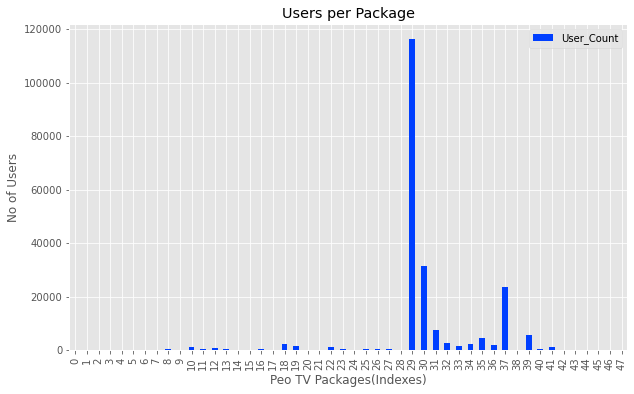

In [153]:
#tv_package_info.plot(x="User_Count", y="Peo_TV_Package")
bar_plot = tv_package_info.plot(kind="bar",title='Users per Package',figsize=(10,6))
bar_plot.set(xlabel='Peo TV Packages(Indexes)',ylabel='No of Users')

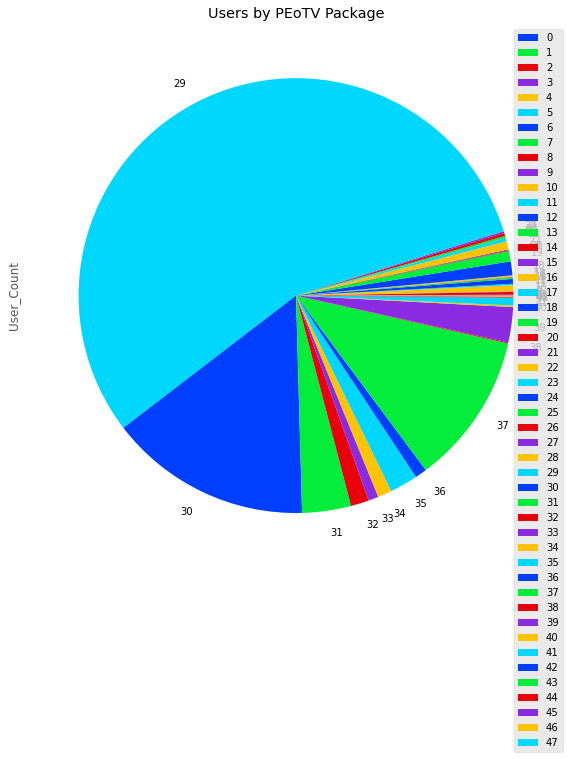

In [154]:
packages_plot = tv_package_info.plot(kind="pie",y="User_Count",title='Users by PEoTV Package',figsize=(20,10))